## Under Sampling with OneSided Method

# One Sided Selection

First finds the hardest instances to classify correctly from the majority class. Then removes noisy observations with Tomek Links.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for metrics
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import OneSidedSelection

## create simulated data

In [2]:
def create_data(sep):
    
    X,y = make_classification(n_samples=1000,
                              n_features=2,
                              n_redundant=0,
                              n_clusters_per_class=1,
                              weights=[0.99],
                              class_sep=sep,
                              random_state=0)
    
    X = pd.DataFrame(X, columns=['varA','varB'])
    y = pd.Series(y)
    
    return X,y

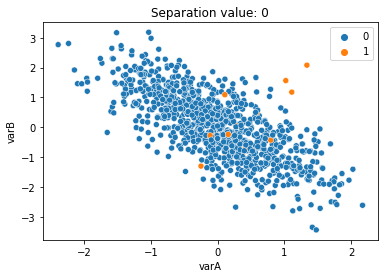

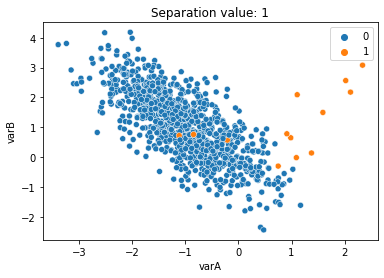

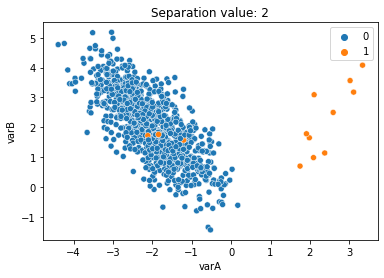

In [3]:
# create data for different sep values and plot them
for i in [0,1,2]:
    X,y = create_data(i)
    
    #df = pd.DataFrame(pd.concat([X,y], axis = 1), columns = ['varA','varB','target'])
    
    # plot
    sns.scatterplot(data = X, x = 'varA', y ='varB', hue=y)
    plt.title('Separation value: {}'.format(i))
    plt.show()
    

In [4]:
# original data shape
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# original data value counts
y.value_counts()

0    984
1     16
dtype: int64

## resample using OneSidedSelection method

In [6]:
# lets generate data when sep = 2
X,y = create_data(sep=2)

In [7]:
oss = OneSidedSelection(sampling_strategy='auto', # this will reduce the majority class by default
                                 n_neighbors=1, # knn = 1 default value
                                 n_jobs=2,
                                 random_state=0)

X_res, y_res = oss.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(772, 2) (772,)
Value Counts: 
0    756
1     16
dtype: int64


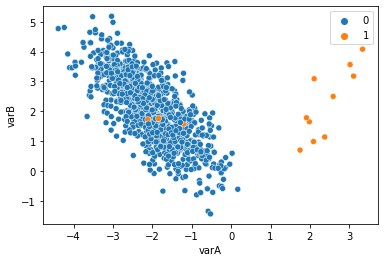

In [8]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

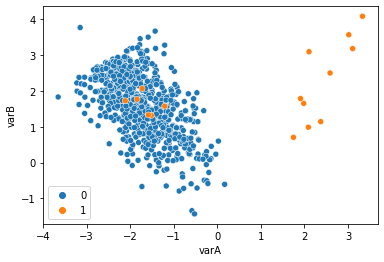

In [10]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

We can see some of the observations that are far away from the minority class are removed and this results in a reduced dataset

## Lets check for a partially separated class

In [11]:
X,y = create_data(sep=0.5)

In [12]:
# create resampled data for the partially separated class dataset

oss = OneSidedSelection(sampling_strategy='auto', # this will reduce the majority class by default
                                 n_neighbors=1, # knn = 1 default value
                                 n_jobs=2,
                                 random_state=0)

X_res, y_res = oss.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(774, 2) (774,)
Value Counts: 
0    758
1     16
dtype: int64


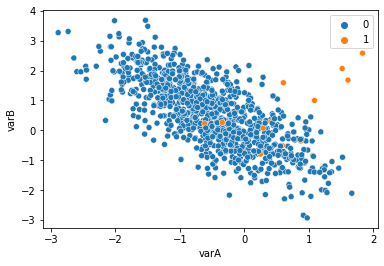

In [13]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

# we can very less separation and much overlapped since we provide a lower seperation value 

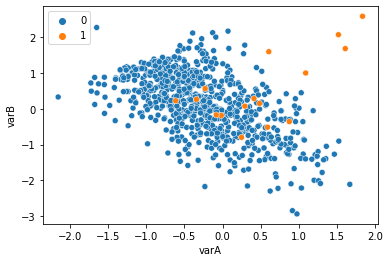

In [14]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- Here also, we can see observations in majority class that are very far or very much different from the minority class are removed
- Also, we can see more observations from minority class after the reducion of the observations from the majority class
- But in both these separations group, there is not much difference in the reduced data sets though

## Different KNN values

In [15]:
def create_resampled_data(knn,X,y):
    oss = OneSidedSelection(sampling_strategy='auto', # this will reduce the majority class by default
                                     n_neighbors=knn, # knn = 1 default value
                                     n_jobs=2,
                                     random_state=0)

    X_res, y_res = oss.fit_resample(X,y)
    print('Resample Data Shapes for knn = {}'.format(knn))
    print(X_res.shape, y_res.shape)
    print('Value Counts: ')
    print(y_res.value_counts())

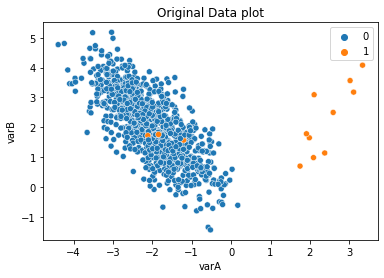

Resample Data Shapes for knn = 1
(772, 2) (772,)
Value Counts: 
0    756
1     16
dtype: int64


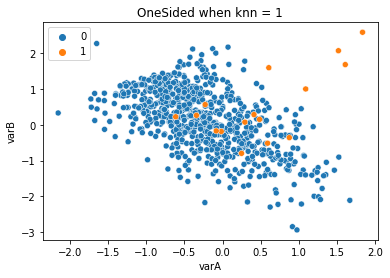

Resample Data Shapes for knn = 2
(755, 2) (755,)
Value Counts: 
0    739
1     16
dtype: int64


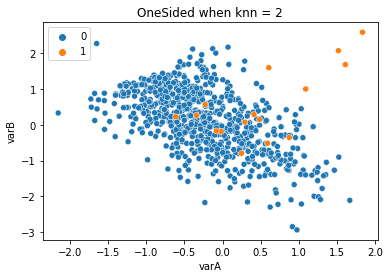

Resample Data Shapes for knn = 3
(999, 2) (999,)
Value Counts: 
0    983
1     16
dtype: int64


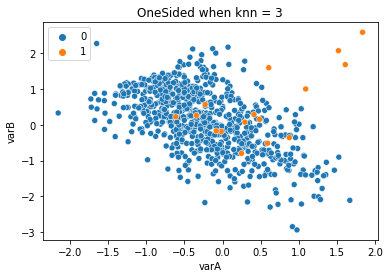

Resample Data Shapes for knn = 4
(999, 2) (999,)
Value Counts: 
0    983
1     16
dtype: int64


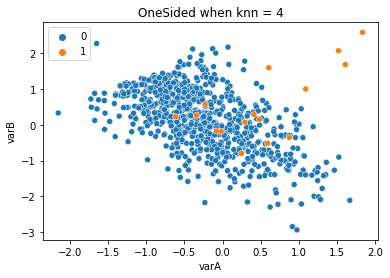

In [17]:
# when sep = 2
X, y = create_data(sep=2)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # condensed data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('OneSided when knn = {}'.format(i))
    plt.show()
    

## Working on a real data

In [18]:
# sampling to only 10000 observations to speed up the computation
df = pd.read_csv('kdd2004.csv').sample(10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
143859,74.34,29.76,2.57,65.0,41.0,1834.5,-0.24,0.84,11.0,-58.5,...,2196.8,-0.14,1.66,11.0,-47.0,420.4,-0.01,0.20,0.88,-1
104959,75.00,28.00,2.66,50.5,-42.5,1313.5,-1.89,-0.21,6.0,-57.0,...,717.7,0.65,1.73,1.0,-41.0,240.2,0.38,0.11,-0.74,-1
98366,28.48,28.26,-0.36,-25.0,24.5,1196.1,0.87,-0.77,0.5,-50.5,...,1425.2,0.66,-0.03,-3.0,-39.0,458.5,0.02,0.49,0.29,-1
7088,59.03,24.71,-0.33,0.5,-1.5,447.5,1.47,-1.30,-11.5,-46.5,...,548.3,0.48,-1.42,-2.0,-49.0,159.1,1.76,0.04,-0.72,-1
17026,76.58,28.93,1.35,25.5,-61.0,1112.8,0.24,0.79,-24.5,-97.5,...,1268.8,-2.61,-1.11,1.0,-22.0,384.7,-1.67,-0.06,-1.00,-1


In [19]:
df.shape

(10000, 75)

In [20]:
# check the target values ratios
df['target'].value_counts()

-1    9916
 1      84
Name: target, dtype: int64

In [21]:
df['target'].value_counts()/len(df)

-1    0.9916
 1    0.0084
Name: target, dtype: float64

## split the data

In [22]:
X_train, X_test, y_train,y_test = train_test_split(df.drop('target', axis = 1),
                                                  df['target'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [23]:
# now lets prepare our condensed under resampled data sets
oss = OneSidedSelection(sampling_strategy='auto',
                                n_neighbors=1,
                                n_jobs=2,
                                random_state=0)

X_oss, y_oss = oss.fit_resample(X_train, y_train)
X_oss.shape, y_oss.shape

((6800, 74), (6800,))

In [25]:
# target value ratio
y_oss.value_counts()

-1    6738
 1      62
Name: target, dtype: int64

## plot and compare

In [40]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
114031,78.57,27.27,1.86,21.5,-44.0,613.2,0.94,1.50,13.0,-82.0,...,-11.0,879.3,-0.33,0.11,0.0,-34.0,186.7,0.92,0.14,0.56
16068,73.71,23.26,0.39,12.5,52.5,2262.9,0.13,3.04,30.5,-98.0,...,7.0,2857.6,-0.15,-0.04,-10.0,-55.0,1378.2,-1.12,0.31,0.66
138902,39.47,36.67,-1.18,0.5,10.5,1877.0,-1.17,-1.08,-4.0,-75.5,...,-21.0,767.0,0.93,0.59,-7.0,-58.0,387.6,0.17,0.15,0.80
96340,55.36,29.03,-2.43,-15.0,28.0,1366.1,-2.35,-0.06,-2.0,-60.0,...,40.0,497.1,1.11,0.88,-1.0,-22.0,48.1,0.55,0.65,0.17
62198,59.68,25.93,-1.67,-13.5,69.0,2068.3,-2.18,1.16,6.5,-60.0,...,11.0,1551.2,0.20,1.72,5.0,-44.0,140.9,1.53,0.26,0.35


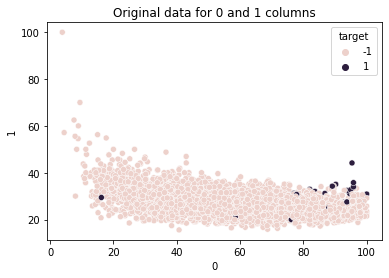

In [26]:
# original dataset

sns.scatterplot(data= X_train, x='0', y = '1', hue=y_train)
plt.title('Original data for 0 and 1 columns')
plt.show()

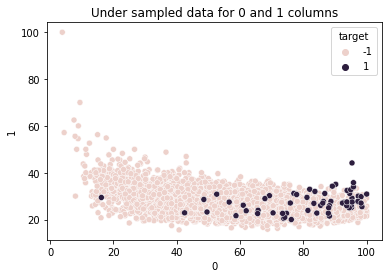

In [29]:
# onesided under sampled dataset

sns.scatterplot(data= X_oss, x='0', y = '1', hue=y_oss)
plt.title('Under sampled data for 0 and 1 columns')
plt.show()

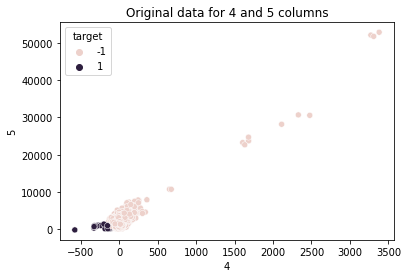

In [28]:
# original dataset

sns.scatterplot(data= X_train, x='4', y = '5', hue=y_train)
plt.title('Original data for 4 and 5 columns')
plt.show()

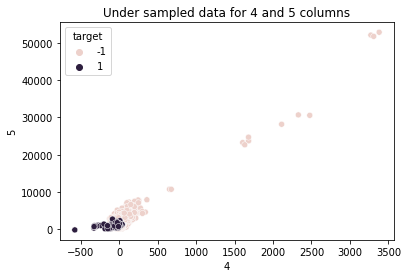

In [30]:
# condensed under sampled dataset

sns.scatterplot(data= X_oss, x='4', y = '5', hue=y_oss)
plt.title('Under sampled data for 4 and 5 columns')
plt.show()

## Model performance on original and condensed resample data

In [31]:
def create_randomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200,
                                n_jobs=2,
                                random_state=39,
                                max_depth=4)
    
    rf.fit(X_train, y_train)
    probs_train = rf.predict_proba(X_train)
    probs_test = rf.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [32]:
# for Original DataSet
create_randomForest(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9930071880899023
roc auc score for test data: 0.8953080163624152


In [33]:
# for condensed dataset
create_randomForest(X_oss, X_test, y_oss, y_test)

roc auc score for train data: 0.9915692413753483
roc auc score for test data: 0.924209353440381


## On SVM classifier

In [34]:
def create_svc(X_train, X_test, y_train, y_test):
    
    svc = SVC(max_iter=1000, random_state=0, probability=True)
    
    svc.fit(X_train, y_train)
    probs_train = svc.predict_proba(X_train)
    probs_test = svc.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [35]:
# for original data
create_svc(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9188503705632376
roc auc score for test data: 0.9134104646193296


In [36]:
# for condensed dataset
create_svc(X_oss, X_test, y_oss, y_test)

roc auc score for train data: 0.9181819052269746
roc auc score for test data: 0.9126472922644849


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegressionCV

In [38]:
def create_log(X_train, X_test, y_train, y_test):
    
    log = LogisticRegressionCV(max_iter=10000, random_state=0, solver='saga', n_jobs=2)
    
    log.fit(X_train, y_train)
    probs_train = log.predict_proba(X_train)
    probs_test = log.predict_proba(X_test)
    
    # get metrics
    print('roc auc score for train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('roc auc score for test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [39]:
# for original data
create_log(X_train, X_test, y_train, y_test)

roc auc score for train data: 0.9065804033885381
roc auc score for test data: 0.8888363147933329


In [40]:
# for condensed dataset
create_log(X_oss, X_test, y_oss, y_test)

roc auc score for train data: 0.9041043096927394
roc auc score for test data: 0.8888057878991391


- Random Forest performs better than the rest of the models
- Overall model performance on the original and under sampled data set doesnt have much difference
- Lets try by under sampling with various knn values and check the model comparison on Random Forest

In [41]:
# create a function to create condensed under sampled data and check the metrics

def create_undersampled_data(knn,X_train, X_test,y_train,y_test):
    oss = OneSidedSelection(sampling_strategy='auto', # this will reduce the majority class by default
                                     n_neighbors=knn, # knn = 1 default value
                                     n_jobs=2,
                                     random_state=0)

    X_res, y_res = oss.fit_resample(X_train,y_train)
    # for original data
    print("*******************")
    print('Metrics for Original Data: {}'.format(knn))
    create_randomForest(X_train, X_test, y_train, y_test)
    # for condensed data
    print('Metrics for resampled Data: {}'.format(knn))
    create_randomForest(X_res, X_test, y_res, y_test)

In [42]:
# trying for knn = 1,2 and 3
for knn in range(1,4):
    create_undersampled_data(knn,X_train, X_test,y_train,y_test)

*******************
Metrics for Original Data: 1
roc auc score for train data: 0.9930071880899023
roc auc score for test data: 0.8953080163624152
Metrics for resampled Data: 1
roc auc score for train data: 0.9915692413753483
roc auc score for test data: 0.924209353440381
*******************
Metrics for Original Data: 2
roc auc score for train data: 0.9930071880899023
roc auc score for test data: 0.8953080163624152
Metrics for resampled Data: 2
roc auc score for train data: 0.9862476331201715
roc auc score for test data: 0.9152344465474083
*******************
Metrics for Original Data: 3
roc auc score for train data: 0.9930071880899023
roc auc score for test data: 0.8953080163624152
Metrics for resampled Data: 3
roc auc score for train data: 0.9938457457699681
roc auc score for test data: 0.9070227120092801


- The overall performace for the model seems to be not much difference when considering different knn values
- Probably, it might vary with different datasets